In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Vivid_8

from ideotype.data_process import (read_data, 
                                   agg_sims, 
                                   parse_mature,
                                   fetch_sim_values,
                                   fetch_emps,
                                   process_clusters)
from ideotype.analysis import (rank_top_phenos, 
                               identify_top_phenos,
                               identify_improved_phenos, 
                               identify_rankchanged_phenos,
                               phenostage_climate,
                               run_pca)
from ideotype.figures import (plot_pca_strategies,
                              plot_strategies)

### Read in pre-clustered results
(see more about clustering plant types into different strategies in analys_strategies_cluster.ipynb)

In [7]:
# parameters
n_pheno = 20
w_yield = 1
w_disp = 1
future_run = 'f2100'
rank_limit = 5

# fetch top phenos
phenos_topall = rank_top_phenos('present', n_pheno, w_yield, w_disp)
phenos_top20 = phenos_topall[:20]

# identify improved & declined phenos
(phenos_improved, phenos_declined, 
 pup_rc, pdown_rc) = identify_rankchanged_phenos(
    n_pheno, w_yield, w_disp, future_run, rank_limit)

In [8]:
# read in clustered data
df_clusters = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/'
                          'strategies_cluster/phenos_strategies_phenomorph_cluster_8.csv')

# run pca
pca, df_pca = run_pca(df_clusters.iloc[:,1:-1], 3)

# manually assign strategies colors
n_clusters = 8
cs_vivid8 = Vivid_8.mpl_colors
cs = [np.nan]*n_clusters
cs[int(df_clusters.query('cvar==58').group)] = cs_vivid8[0]
cs[int(df_clusters.query('cvar==4').group)] = cs_vivid8[1]
cs[int(df_clusters.query('cvar==88').group)] = cs_vivid8[2]
cs[int(df_clusters.query('cvar==89').group)] = cs_vivid8[3]
cs[int(df_clusters.query('cvar==5').group)] = cs_vivid8[4]
cs[int(df_clusters.query('cvar==15').group)] = cs_vivid8[5]
cs[int(df_clusters.query('cvar==55').group)] = cs_vivid8[6]
cs[int(df_clusters.query('cvar==24').group)] = cs_vivid8[7]

### Visualize top-performing strategies
Equal importance in yield & yield stability:

STILL DEBUGGING

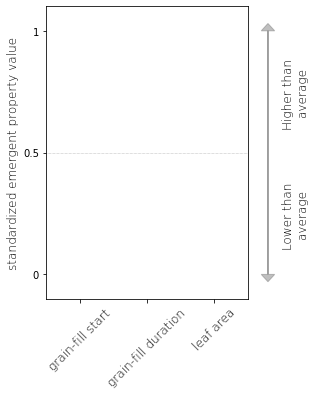

In [10]:
plot_strategies(n_pheno=20, w_yield=1, w_disp=1,
                future_run='f2100', rank_limit=5, df_clusters=df_clusters, n_clusters=8,
                target='top20', target_select=0, target_threshold=5,
                df_emps_std=df_emps_std, save=None)

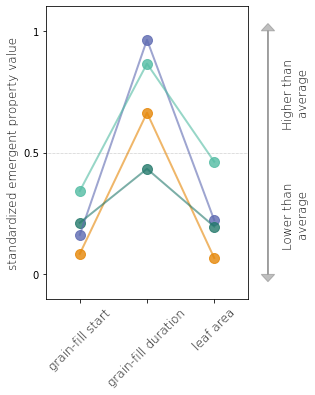

In [9]:
# parameters
n_pheno = 20
w_yield = 1
w_disp = 1
future_run = 'f2100'
rank_limit = 5
target = 'top20'  # 'top20', 'improved', 'declined'
target_select = 0  # top20 (0), improved (1), declined (2)
target_threshold = 0.5

# fetch top phenos
phenos_topall = rank_top_phenos('present', n_pheno, w_yield, w_disp)
phenos_top20 = phenos_topall[:20]

# identify improved & declined phenos
phenos_improved, phenos_declined, pup_rc, pdown_rc = identify_rankchanged_phenos(
    n_pheno, w_yield, w_disp, future_run, rank_limit)


# process clusters
emps = ['jday', 'pheno_days', 'LA']
emps_text = ['grain-fill start', 'grain-fill duration', 'leaf area']

targeted_groups, pheno_groups = process_clusters(
    df_clusters, n_clusters, phenos_top20, phenos_improved, phenos_declined,
    target, target_threshold)

# specify target phenos
targeted_phenos = [phenos_top20, phenos_improved, phenos_declined][target_select]

# visualization
plot_strategies(emps, emps_text, targeted_groups, targeted_phenos, df_clusters, df_emps_std, cs)

Yield emphasis (yield 0.7, yield stability 0.3):

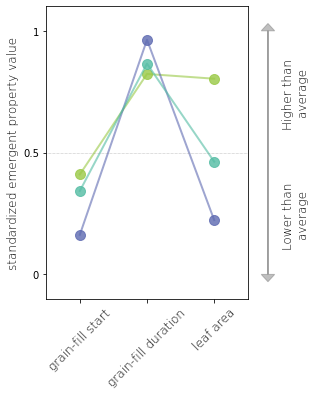

In [201]:
# parameters
w_yield = 0.7
w_disp = 0.3
future_run = 'f2100'
rank_limit = 5
target = 'top20'  # 'top20', 'improved', 'declined'
target_select = 0  # top20 (0), improved (1), declined (2)
target_threshold = 0.5

# fetch top phenos
phenos_topall = rank_top_phenos('present', n_pheno, w_yield, w_disp)
phenos_top20 = phenos_topall[:20]

# identify improved & declined phenos
phenos_improved, phenos_declined, pup_rc, pdown_rc = identify_rankchanged_phenos(
    n_pheno, w_yield, w_disp, future_run, rank_limit)


# process clusters
emps = ['jday', 'pheno_days', 'LA']
emps_text = ['grain-fill start', 'grain-fill duration', 'leaf area']

targeted_groups, pheno_groups = process_clusters(
    df_clusters, n_clusters, phenos_top20, phenos_improved, phenos_declined,
    target, target_threshold)

# specify target phenos
targeted_phenos = [phenos_top20, phenos_improved, phenos_declined][target_select]

# visualization
plot_strategies(emps, emps_text, targeted_groups, targeted_phenos, df_clusters, df_emps_std, cs)

Yield stability emphasis (yield 0.3, yield stability 0.7):

[1, 4, 7]
[[8, 28, 40, 44, 48, 57, 58, 62, 76, 84], [4, 46, 65, 90], [3, 15, 35, 50, 59, 63]]


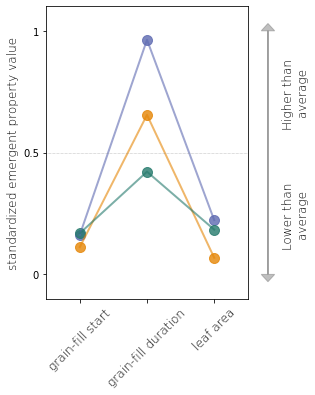

In [202]:
# yield emphasis
n_pheno = 20
w_yield = 0.3
w_disp = 0.7

# fetch top phenos
phenos_topall = rank_top_phenos('present', n_pheno, w_yield, w_disp)
phenos_top20 = phenos_topall[:20]

# identify improved & declined phenos
future_run = 'f2100'
rank_limit = 5

phenos_improved, phenos_declined, pup_rc, pdown_rc = identify_rankchanged_phenos(
    n_pheno, w_yield, w_disp, future_run, rank_limit)


# process clusters
target = 'top20'
target_threshold = 0.6
emps = ['jday', 'pheno_days', 'LA']
emps_text = ['grain-fill start', 'grain-fill duration', 'leaf area']

targeted_groups, pheno_groups = process_clusters(
    df_clusters, n_clusters, phenos_top20, phenos_top20, phenos_declined,
    target, target_threshold)
print(targeted_groups)
print(pheno_groups)


# visualization
plot_strategies(emps, emps_text, targeted_groups,
                phenos_top20, df_clusters, df_emps_std, cs)
#                save=True, save_text='w7d3')

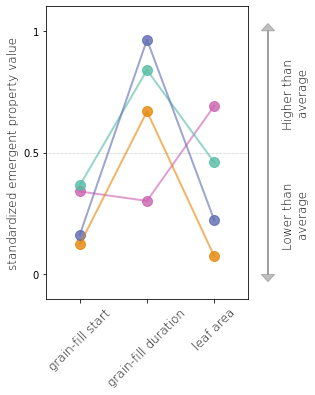

In [26]:
targeted_phenos = phenos_improved_temp
targeted_groups = [3,6]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()

for item, group in enumerate(targeted_groups):
    phenos = list(df_clusters.query(f'group=={group}').cvar)
    x = np.array(phenos)
    y = np.array(targeted_phenos)
    phenos = list(x[np.isin(x, y)])

    emps_mean = df_emps_std[df_emps_std.cvar.isin(phenos)].mean()[emps]
    ax.plot(np.arange(len(emps)), emps_mean,
            color=cs[group], linewidth=2, alpha=0.6)
    ax.scatter(np.arange(len(emps)), emps_mean,
               color=cs[group], s=100, alpha=0.8)


group = 1
phenos = [8,28,40,44,48,57,58,62,76,84]
emps_mean = df_emps_std[df_emps_std.cvar.isin(phenos)].mean()[emps]
ax.plot(np.arange(len(emps)), emps_mean,
        color=cs[group], linewidth=2, alpha=0.6)
ax.scatter(np.arange(len(emps)), emps_mean,
           color=cs[group], s=100, alpha=0.8)

group = 4
phenos = [4,46,65,90]
emps_mean = df_emps_std[df_emps_std.cvar.isin(phenos)].mean()[emps]
ax.plot(np.arange(len(emps)), emps_mean,
        color=cs[group], linewidth=2, alpha=0.6)
ax.scatter(np.arange(len(emps)), emps_mean,
           color=cs[group], s=100, alpha=0.8)



ax.set_xlim(-0.5, len(emps)-0.5)
ax.set_ylim(-0.1, 1.1)
ax.set_xticks(np.arange(len(emps)))
ax.set_xticklabels(emps_text, rotation=45, fontweight='light', fontsize=12)
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1])
ax.set_ylabel('standardized emergent property value',
              fontweight='light', fontsize=12)
ax.axhline(y=0.5, color='grey', linewidth=0.5, linestyle=':')

ax.arrow(len(emps)-0.2, 0, 0, 1, color='grey', alpha=0.5,
         head_length=0.03, head_width=0.2, clip_on=False)
ax.arrow(len(emps)-0.2, 1, 0, -1, color='grey', alpha=0.5,
         head_length=0.03, head_width=0.2, clip_on=False)

ax.annotate('Lower than \naverage', (len(emps)+0.2, 0.25),
            ha='center', va='center', fontweight='light',
            fontsize=12, rotation=90, annotation_clip=False)
ax.annotate('Higher than \naverage', (len(emps)+0.2, 0.75),
            ha='center', va='center', fontweight='light',
            fontsize=12, rotation=90, annotation_clip=False)

fig.subplots_adjust(left=0.3, right=0.7, bottom=0.3)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/strategies_present.png', format='png', dpi=800)

0 [21, 89]
3 [5]
5 [16, 54, 73]
6 [9, 30, 42, 78, 81, 88]


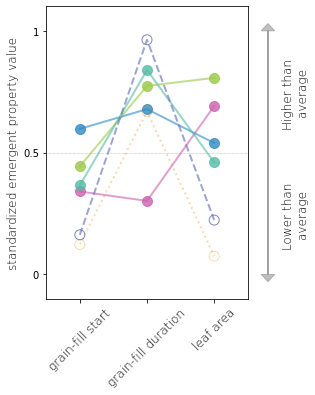

In [27]:
targeted_phenos = phenos_improved_temp
targeted_groups = [0,3,5,6]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()

for item, group in enumerate(targeted_groups):
    phenos = list(df_clusters.query(f'group=={group}').cvar)
    x = np.array(phenos)
    y = np.array(targeted_phenos)
    phenos = list(x[np.isin(x, y)])
    print(group, phenos)

    emps_mean = df_emps_std[df_emps_std.cvar.isin(phenos)].mean()[emps]
    ax.plot(np.arange(len(emps)), emps_mean,
            color=cs[group], linewidth=2, alpha=0.6)
    ax.scatter(np.arange(len(emps)), emps_mean,
               color=cs[group], s=100, alpha=0.8)


group = 1
phenos = [8,28,40,44,48,57,58,62,76,84]
emps_mean = df_emps_std[df_emps_std.cvar.isin(phenos)].mean()[emps]
ax.plot(np.arange(len(emps)), emps_mean,
        color=cs[group], linewidth=2, linestyle=':', alpha=0.3)
ax.scatter(np.arange(len(emps)), emps_mean,
           color=cs[group], s=100, facecolor='none', alpha=0.3)

group = 4
phenos = [4,46,65,90]
emps_mean = df_emps_std[df_emps_std.cvar.isin(phenos)].mean()[emps]
ax.plot(np.arange(len(emps)), emps_mean,
        color=cs[group], linewidth=2, linestyle='--', alpha=0.6)
ax.scatter(np.arange(len(emps)), emps_mean,
           color=cs[group], s=100, facecolors='none', alpha=0.8)



ax.set_xlim(-0.5, len(emps)-0.5)
ax.set_ylim(-0.1, 1.1)
ax.set_xticks(np.arange(len(emps)))
ax.set_xticklabels(emps_text, rotation=45, fontweight='light', fontsize=12)
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1])
ax.set_ylabel('standardized emergent property value',
              fontweight='light', fontsize=12)
ax.axhline(y=0.5, color='grey', linewidth=0.5, linestyle=':')

ax.arrow(len(emps)-0.2, 0, 0, 1, color='grey', alpha=0.5,
         head_length=0.03, head_width=0.2, clip_on=False)
ax.arrow(len(emps)-0.2, 1, 0, -1, color='grey', alpha=0.5,
         head_length=0.03, head_width=0.2, clip_on=False)

ax.annotate('Lower than \naverage', (len(emps)+0.2, 0.25),
            ha='center', va='center', fontweight='light',
            fontsize=12, rotation=90, annotation_clip=False)
ax.annotate('Higher than \naverage', (len(emps)+0.2, 0.75),
            ha='center', va='center', fontweight='light',
            fontsize=12, rotation=90, annotation_clip=False)

fig.subplots_adjust(left=0.3, right=0.7, bottom=0.3)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/strategies_f2100.png', format='png', dpi=800)

#### V update this code to plot current strategy groups

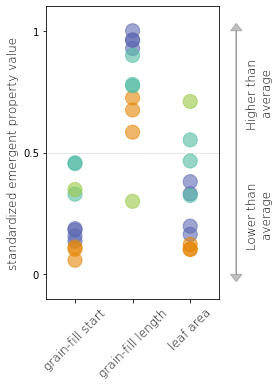

In [118]:
# phenos of interest
phenos = [4,65,46,90,  # slow aging
          8, 28, 40, 44, 48, 57, 58, 62, 76, 84,  # stress averters
          9, 29, 30, 42, 78, 81, 88]  # high yielders

# fig parameters
c1 = Vivid_4.mpl_colors[1]
c2 = Vivid_4.mpl_colors[0]
c3 = Vivid_4.mpl_colors[2]
c4 = Vivid_4.mpl_colors[3]
#c5 = 'mediumvioletred'

colors = [c1, c1, c1, c1,
          c2, c2, c2,
          c3, c3, c3, c4]

alphas=[0.6]*len(phenos)

# fetch emergent properties & standardize
gf_startdates = df_phenology[df_phenology.pheno=='"grainFill"'].groupby(['cvar']).mean()['jday']
gf_lengths = df_phenology[df_phenology.pheno=='"grainFill"'].groupby(['cvar']).mean()['pheno_days']
LAs = []
for pheno in np.arange(100):
    LA = df_leaves.query(f'cvar=={pheno}').groupby('site').max()['LA'].mean()
    LAs.append(LA)

gf_start_std = [(gf_startdates[pheno]-min(gf_startdates))/(max(gf_startdates)-min(gf_startdates)) for pheno in phenos]
gf_len_std = [(gf_lengths[pheno]-min(gf_lengths))/(max(gf_lengths)-min(gf_lengths)) for pheno in phenos]
la_std = [(LAs[pheno]-min(LAs))/(max(LAs)-min(LAs)) for pheno in phenos]

    
# visualization
fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(1,1,1)

ax.scatter([1]*len(phenos), gf_start_std, c=colors, s=200, alpha=alphas)
ax.scatter([2]*len(phenos), gf_len_std, c=colors, s=200, alpha=alphas)
ax.scatter([3]*len(phenos), la_std, c=colors, s=200, alpha=alphas)

#for item, pheno in enumerate(phenos):
#    ax.annotate(pheno, (1.15, gf_start_std[item]), color='grey')
#for item, pheno in enumerate(phenos):
#    ax.annotate(pheno, (2.15, gf_len_std[item]), color='grey')
#for item, pheno in enumerate(phenos):
#    ax.annotate(pheno, (3.15, la_std[item]), color='grey')

ax.set_xlim(0.5, 3.5)
ax.set_ylim(-0.1, 1.1)
ax.set_xticks([1,2,3])
ax.set_xticklabels(['grain-fill start', 'grain-fill length', 'leaf area'], 
                   rotation=45, fontweight='light', fontsize=12)
ax.set_yticks([0,0.5,1])
ax.set_yticklabels([0,0.5,1])
ax.set_ylabel('standardized emergent property value', fontweight='light', fontsize=12)
ax.axhline(y=0.5, color='grey', linewidth=0.5, linestyle=':')


ax.arrow(3.8, 0, 0, 1, color='grey', alpha=0.5,
         head_length=0.03, head_width=0.2, clip_on=False)
ax.arrow(3.8, 1, 0, -1, color='grey', alpha=0.5,
         head_length=0.03, head_width=0.2, clip_on=False)

ax.annotate('Lower than \naverage', (4.2, 0.25), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)
ax.annotate('Higher than \naverage', (4.2, 0.75), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)

fig.subplots_adjust(left=0.3, right=0.7, bottom=0.3)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_strategies.png', format='png', dpi=800)

## Strategies

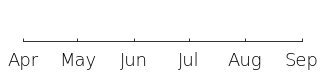

In [601]:
fig = plt.figure(figsize=(5,1))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(91,244)
ax.set_xticks([91, 121, 152, 182, 213, 244])
ax.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'], 
                   fontweight='light', fontsize=18)
ax.tick_params(axis='x', direction='in', pad=10)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_visible(False)

fig.subplots_adjust(bottom=0.4)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/phenostage_timeline.png', format='png', dpi=800)

## Mechanisms

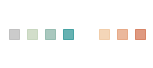

In [800]:
fig = plt.figure(figsize=(2.5,1))
ax = fig.add_subplot(1,1,1)

colors = ['darkgrey', 
          Geyser_7.mpl_colors[2],
          Geyser_7.mpl_colors[1],
          Geyser_7.mpl_colors[0],          
          Geyser_7.mpl_colors[-3],
          Geyser_7.mpl_colors[-2],
          Geyser_7.mpl_colors[-1]]

ax.scatter([1,2,3,4,6,7,8], [1,1,1,1,1,1,1],
            c=colors, marker='s', s=100, alpha=0.6)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/cpalette_phenostages.png', format='png', dpi=800)

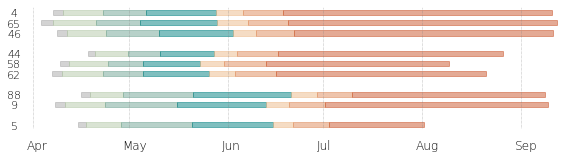

In [806]:
# identify targeted phenos
phenos = [4,65,46,44,58,62,88,9,5]
df_phenology_grouped = df_phenology.groupby(['cvar', 'pheno']).mean()
df_phenos = df_phenology_grouped.query(f'cvar in {phenos}')  

# set up phenostages
phenostages = [['"none"', '"Germinated"'],
               ['"Germinated"', '"Emerged"'],
               ['"Emerged"', '"Tasselinit"'],
               ['"Tasselinit"', '"Tasseled"'],
               ['"Tasseled"', '"Silked"'],
               ['"Silked"', '"grainFill"'],
               ['"grainFill"', '"Matured"']]
        
colors = ['darkgrey', 
          Geyser_7.mpl_colors[2],
          Geyser_7.mpl_colors[1],
          Geyser_7.mpl_colors[0],          
          Geyser_7.mpl_colors[-3],
          Geyser_7.mpl_colors[-2],
          Geyser_7.mpl_colors[-1]]

# visualization
fig = plt.figure(figsize=(10,2.5))

ax = fig.add_subplot(1,1,1)
ax.plot([85,270],[0,10], alpha=0)
ax.set_xlim(85,260)
ax.set_ylim(0.8,12.8)

jday_months = [91, 121, 152, 182, 213, 244, 274, 305, 335, 350]
for jday_month in jday_months:
    ax.axvline(x=jday_month, color='grey', linewidth=0.5, linestyle=':')

for phenostage, color in zip(phenostages, colors):
    df_phenostage1 = df_phenos[
        df_phenos.index.get_level_values('pheno') == f'{phenostage[0]}'].reset_index()
    df_phenostage1.index = df_phenostage1.cvar
    df_phenostage1 = df_phenostage1.reindex(phenos)

    df_phenostage2 = df_phenos[
        df_phenos.index.get_level_values('pheno') == f'{phenostage[1]}'].reset_index()
    df_phenostage2.index = df_phenostage2.cvar
    df_phenostage2 = df_phenostage2.reindex(phenos)

    cvars1 = np.arange(len(phenos))
    cvars2 = np.arange(len(phenos))

    jdays_start = np.empty(len(phenos))
    jdays_start[:] = np.nan
    jdays_start[cvars1] = list(df_phenostage1.jday.values)

    jdays_end = np.empty(len(phenos))
    jdays_end[:] = np.nan
    jdays_end[cvars2] = list(df_phenostage2.jday.values)

    jdays_len = [jend - jstart for jend, jstart in zip(jdays_end, jdays_start)]
    rankings = list(np.arange(len(phenos)))
    rankings.reverse()
    
    poss = [12,11,10,8,7,6,4,3,1]
    for item in np.arange(len(phenos)):
        rect = patches.Rectangle((jdays_start[item], poss[item]), 
                                 jdays_len[item], 0.5,
                                 color=color, alpha=0.5, clip_on=False)
        ax.add_patch(rect)

# invisible spines & axes
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', direction='in', pad=10)

# annotate x & y axis info
xs = [91, 121, 152, 182, 213, 244]
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
for item in np.arange(len(months)):
    ax.text(xs[item]-2, -1.2, months[item], 
            fontweight='light', fontsize=12, clip_on=False)

for pos, pheno in zip(poss, phenos):
    ax.text(85, pos-0.2, pheno, 
            fontweight='light', fontsize=11, clip_on=False, ha='center')

fig.subplots_adjust(bottom=0.2)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/bars_phenostage_strategies.png', format='png', dpi=800)

In [155]:
import os
from ideotype import DATA_PATH
from datetime import datetime

run_name = 'present'

# Queried maizsim outputs
df_sims = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_yield.csv'))
df_phys = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_phys.csv'))
df_carbon = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_carbon.csv'))
df_mass = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_mass.csv'))
df_leaves = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_leaves.csv'))
df_waterdeficit = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterdeficit.csv'))
df_waterdeficit_sum = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterdeficit_sum.csv'))
df_waterpotential = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterpotential.csv'))
df_phenology = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_pheno.csv'))
start_dates = [int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates
df_gseason_climate = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_gseason_climate.csv'))

In [23]:
df = df_phys
phenostage = '"Emerged"'
mechanism = 'An'
phenos_all = np.arange(100)
phenos = [4,65,46,44,58,62,88,9,5]
sims_all = fetch_sim_values(df, phenostage, mechanism, phenos_all)
sims = fetch_sim_values(df, phenostage, mechanism, phenos)
[(sim - min(sims_all))/max(sims_all) for sim in sims]

[0.13209848072405417,
 0.04568273064752621,
 0.15815161119854193,
 0.26881773075129817,
 0.12799159637711838,
 0.10872926455444337,
 0.28806889149094334,
 0.18327822723770829,
 0.21114924255517603]

In [190]:
pheno_groups = [[21,89],[5,12,52,79],[16,54,73],[81,88,9,30]]
#pheno_groups = [[21,89],[5,12,52,79],[16,54,73],[81,88,9,42]]
colors = [c1,c2,c3,c4]

In [194]:
df_phenology.head()

,cvar,site,year,pheno,pheno_days,jday_start,date_start,jday
0,0,722080,1961,"""Emerged""",26,22356,03/16/1961,75
1,0,722080,1961,"""Germinated""",11,22346,03/06/1961,65
2,0,722080,1961,"""Matured""",1,22485,07/23/1961,204
3,0,722080,1961,"""Silked""",13,22427,05/26/1961,146
4,0,722080,1961,"""Tasseled""",11,22417,05/16/1961,136


In [222]:
# present
run_name = 'present'
df_phenology = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_pheno.csv'))
start_dates = [int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates
gf_start_present = fetch_sim_values(df_phenology, '"grainFill"', 'jday', phenos_all)

# f2100
run_name = 'f2100'
df_phenology = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_pheno.csv'))
start_dates = [int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates
gf_start_f2100 = fetch_sim_values(df_phenology, '"grainFill"', 'jday', phenos_all)

[Text(0, 0, '4'),
 Text(1, 0, '65'),
 Text(2, 0, '90'),
 Text(3, 0, '46'),
 Text(4, 0, '58'),
 Text(5, 0, '42'),
 Text(6, 0, '63'),
 Text(7, 0, '50'),
 Text(8, 0, '44'),
 Text(9, 0, '62'),
 Text(10, 0, '57'),
 Text(11, 0, '81'),
 Text(12, 0, '84'),
 Text(13, 0, '9'),
 Text(14, 0, '48'),
 Text(15, 0, '88'),
 Text(16, 0, '78'),
 Text(17, 0, '59'),
 Text(18, 0, '55'),
 Text(19, 0, '5')]

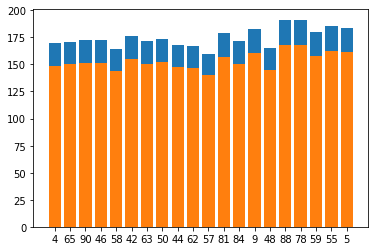

In [223]:
fig = plt.figure()
ax = fig.add_subplot()
gf_lens_present_top20 = [gf_lens_present[pheno] for pheno in phenos_top20]
gf_lens_f2100_top20 = [gf_lens_f2100[pheno] for pheno in phenos_top20]
plt.bar(np.arange(len(phenos_top20)), gf_lens_present_top20)
plt.bar(np.arange(len(phenos_top20)), gf_lens_f2100_top20)
ax.set_xticks(np.arange(len(phenos_top20)))
ax.set_xticklabels(phenos_top20)

[Text(0, 0, '21'),
 Text(1, 0, '25'),
 Text(2, 0, '73'),
 Text(3, 0, '18'),
 Text(4, 0, '30'),
 Text(5, 0, '89'),
 Text(6, 0, '12'),
 Text(7, 0, '79'),
 Text(8, 0, '16'),
 Text(9, 0, '7'),
 Text(10, 0, '81'),
 Text(11, 0, '5'),
 Text(12, 0, '88'),
 Text(13, 0, '54'),
 Text(14, 0, '52'),
 Text(15, 0, '9'),
 Text(16, 0, '35')]

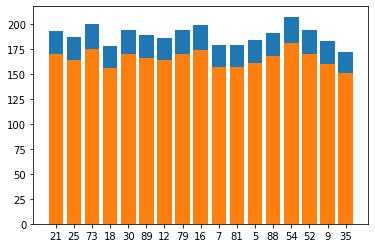

In [224]:
fig = plt.figure()
ax = fig.add_subplot()
gf_lens_present_top20 = [gf_lens_present[pheno] for pheno in phenos_improved]
gf_lens_f2100_top20 = [gf_lens_f2100[pheno] for pheno in phenos_improved]
plt.bar(np.arange(len(phenos_improved)), gf_lens_present_top20)
plt.bar(np.arange(len(phenos_improved)), gf_lens_f2100_top20)
ax.set_xticks(np.arange(len(phenos_improved)))
ax.set_xticklabels(phenos_improved)

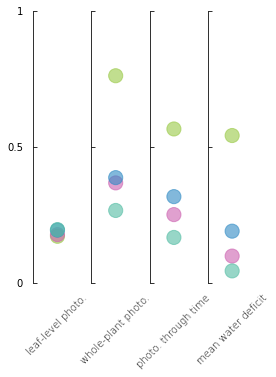

In [191]:
phenostage = '"Emerged"'
dfs = [df_phys, df_phys, df_carbon, df_waterdeficit]
mechanisms = ['An', 'pn', 'pn_sum', 'water_deficit_mean']
xlabels = ['leaf-level photo.', 'whole-plant photo.', 'photo. through time', 'mean water deficit']

fig = plt.figure(figsize=(4,5))

for count, (df, mechanism) in enumerate(zip(dfs, mechanisms)):
    ax = fig.add_subplot(1,4,count+1)
    
    for item, phenos in enumerate(pheno_groups):
        sims_all = fetch_sim_values(df, phenostage, mechanism, phenos_all)
        sims = fetch_sim_values(df, phenostage, mechanism, phenos)
        sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]
        sims_std_mean = np.mean(sims_std)

        if count == 3:
            sims_all = [sim*-1 for sim in sims_all]
            sims = [sim*-1 for sim in sims]
            sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]
            sims_std_mean = np.mean(sims_std)

        ax.scatter(1, sims_std_mean,
                   s=200, color=colors[item], alpha=alphas, clip_on=False)

        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.set_xticks([0])
        ax.set_xticklabels([0])
        ax.set_xlabel(xlabels[count], rotation=45, labelpad=10,
                      fontsize=10, fontweight='light')
        ax.set_ylim(0,1)
        ax.set_yticks([0,0.5,1])

        if count == 0:
            ax.set_yticklabels([0,0.5,1])
        else:
            ax.set_yticklabels(['','',''])
        ax.tick_params(axis='y', direction='in', pad=10)

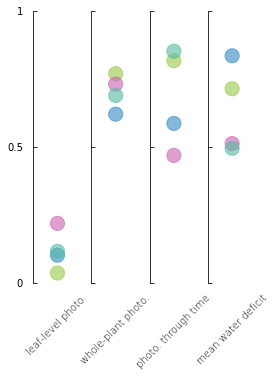

In [192]:
phenostage = '"grainFill"'
dfs = [df_phys, df_phys, df_carbon, df_waterdeficit]
mechanisms = ['An', 'pn', 'pn_sum', 'water_deficit_mean']
xlabels = ['leaf-level photo.', 'whole-plant photo.', 'photo. through time', 'mean water deficit']

fig = plt.figure(figsize=(4,5))

for count, (df, mechanism) in enumerate(zip(dfs, mechanisms)):
    ax = fig.add_subplot(1,4,count+1)
    
    for item, phenos in enumerate(pheno_groups):
        sims_all = fetch_sim_values(df, phenostage, mechanism, phenos_all)
        sims = fetch_sim_values(df, phenostage, mechanism, phenos)
        sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]
        sims_std_mean = np.mean(sims_std)

        if count == 3:
            sims_all = [sim*-1 for sim in sims_all]
            sims = [sim*-1 for sim in sims]
            sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]
            sims_std_mean = np.mean(sims_std)

        ax.scatter(1, sims_std_mean,
                   s=200, color=colors[item], alpha=alphas, clip_on=False)

        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.set_xticks([0])
        ax.set_xticklabels([0])
        ax.set_xlabel(xlabels[count], rotation=45, labelpad=10,
                      fontsize=10, fontweight='light')
        ax.set_ylim(0,1)
        ax.set_yticks([0,0.5,1])

        if count == 0:
            ax.set_yticklabels([0,0.5,1])
        else:
            ax.set_yticklabels(['','',''])
        ax.tick_params(axis='y', direction='in', pad=10)

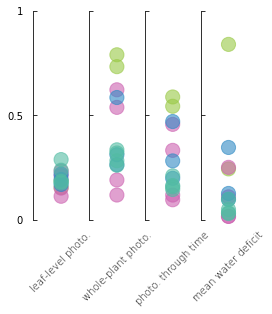

In [179]:
# identify phenos
phenos_all = np.arange(100)
phenos = [21,89,
          5,12,52,79,
          16,54,73,
          81,88,9,42]

# set up fig parameters
c1 = cs[0]
c2 = cs[3]
c3 = cs[5]
c4 = cs[6]
colors = [c1, c1, c2, c2, c2, c2, c3, c3, c3, c4, c4, c4, c4]
alphas=[0.6]*13

phenostage = '"Emerged"'
dfs = [df_phys, df_phys, df_carbon, df_waterdeficit]
mechanisms = ['An', 'pn', 'pn_sum', 'water_deficit_mean']
xlabels = ['leaf-level photo.', 'whole-plant photo.', 'photo. through time', 'mean water deficit']

# visualization
fig = plt.figure(figsize=(4,5))

for count, (df, mechanism) in enumerate(zip(dfs, mechanisms)):
    ax = fig.add_subplot(1,4,count+1)
    sims_all = fetch_sim_values(df, phenostage, mechanism, phenos_all)
    sims = fetch_sim_values(df, phenostage, mechanism, phenos)
    sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]

    if count == 3:
        sims_all = [sim*-1 for sim in sims_all]
        sims = [sim*-1 for sim in sims]
        sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]

    ax.scatter([1]*len(phenos), sims_std,
               s=200, c=colors, alpha=alphas, clip_on=False)

    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xticks([0])
    ax.set_xticklabels([0])
    ax.set_xlabel(xlabels[count], rotation=45, labelpad=10,
                  fontsize=10, fontweight='light')
    ax.set_ylim(0,1)
    ax.set_yticks([0,0.5,1])
    
    if count == 0:
        ax.set_yticklabels([0,0.5,1])
    else:
        ax.set_yticklabels(['','',''])
    ax.tick_params(axis='y', direction='in', pad=10)

fig.subplots_adjust(wspace=0, bottom=0.3)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_mechanisms_veg.png', format='png', dpi=800)

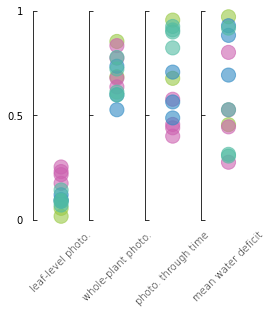

In [157]:
# identify phenos
phenos_all = np.arange(100)

# set up fig parameters
c1 = cs[0]
c2 = cs[3]
c3 = cs[5]
c4 = cs[6]
colors = [c1, c1, c2, c2, c2, c2, c3, c3, c3, c4, c4, c4, c4]
alphas=[0.6]*13

phenostage = '"grainFill"'
dfs = [df_phys, df_phys, df_carbon, df_waterdeficit]
mechanisms = ['An', 'pn', 'pn_sum', 'water_deficit_mean']
xlabels = ['leaf-level photo.', 'whole-plant photo.', 'photo. through time', 'mean water deficit']

# visualization
fig = plt.figure(figsize=(4,5))

for count, (df, mechanism) in enumerate(zip(dfs, mechanisms)):
    ax = fig.add_subplot(1,4,count+1)
    sims_all = fetch_sim_values(df, phenostage, mechanism, phenos_all)
    sims = fetch_sim_values(df, phenostage, mechanism, phenos)
    sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]

    if count == 3:
        sims_all = [sim*-1 for sim in sims_all]
        sims = [sim*-1 for sim in sims]
        sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]

    ax.scatter([1]*len(phenos), sims_std,
               s=200, c=colors, alpha=alphas, clip_on=False)

    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xticks([0])
    ax.set_xticklabels([0])
    ax.set_xlabel(xlabels[count], rotation=45, labelpad=10,
                  fontsize=10, fontweight='light')
    ax.set_ylim(0,1)
    ax.set_yticks([0,0.5,1])
    if count == 0:
        ax.set_yticklabels([0,0.5,1])
    else:
        ax.set_yticklabels(['','',''])
    ax.tick_params(axis='y', direction='in', pad=10)

fig.subplots_adjust(wspace=0, bottom=0.3)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_mechanisms_rep.png', format='png', dpi=800)

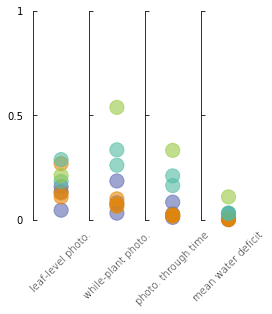

In [296]:
# identify phenos
phenos_all = np.arange(100)
phenos = [4,65,46,44,58,62,88,9,5]

# set up fig parameters
c1 = Vivid_4.mpl_colors[1]
c2 = Vivid_4.mpl_colors[0]
c3 = Vivid_4.mpl_colors[2]
c4 = Vivid_4.mpl_colors[3]
colors = [c1, c1, c1, c2, c2, c2, c3, c3, c4]
alphas=[0.6]*9

phenostage = '"Emerged"'
dfs = [df_phys, df_phys, df_carbon, df_waterdeficit]
mechanisms = ['An', 'pn', 'pn_sum', 'water_deficit_mean']
xlabels = ['leaf-level photo.', 'whole-plant photo.', 'photo. through time', 'mean water deficit']

# visualization
fig = plt.figure(figsize=(4,5))

for count, (df, mechanism) in enumerate(zip(dfs, mechanisms)):
    ax = fig.add_subplot(1,4,count+1)
    sims_all = fetch_sim_values(df, phenostage, mechanism, phenos_all)
    sims = fetch_sim_values(df, phenostage, mechanism, phenos)
    sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]

    if count == 3:
        sims_all = [sim*-1 for sim in sims_all]
        sims = [sim*-1 for sim in sims]
        sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]

    ax.scatter([1]*len(phenos), sims_std,
               s=200, c=colors, alpha=alphas, clip_on=False)

    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xticks([0])
    ax.set_xticklabels([0])
    ax.set_xlabel(xlabels[count], rotation=45, labelpad=10,
                  fontsize=10, fontweight='light')
    ax.set_ylim(0,1)
    ax.set_yticks([0,0.5,1])
    
    if count == 0:
        ax.set_yticklabels([0,0.5,1])
    else:
        ax.set_yticklabels(['','',''])
    ax.tick_params(axis='y', direction='in', pad=10)

fig.subplots_adjust(wspace=0, bottom=0.3)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_mechanisms_veg.png', format='png', dpi=800)

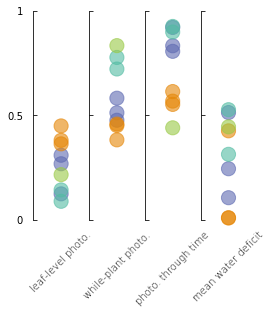

In [297]:
# identify phenos
phenos_all = np.arange(100)
phenos = [4,65,46,44,58,62,88,9,5]

# set up fig parameters
c1 = Vivid_4.mpl_colors[1]
c2 = Vivid_4.mpl_colors[0]
c3 = Vivid_4.mpl_colors[2]
c4 = Vivid_4.mpl_colors[3]
colors = [c1, c1, c1, c2, c2, c2, c3, c3, c4]
alphas=[0.6]*9

phenostage = '"grainFill"'
dfs = [df_phys, df_phys, df_carbon, df_waterdeficit]
mechanisms = ['An', 'pn', 'pn_sum', 'water_deficit_mean']
xlabels = ['leaf-level photo.', 'whole-plant photo.', 'photo. through time', 'mean water deficit']

# visualization
fig = plt.figure(figsize=(4,5))

for count, (df, mechanism) in enumerate(zip(dfs, mechanisms)):
    ax = fig.add_subplot(1,4,count+1)
    sims_all = fetch_sim_values(df, phenostage, mechanism, phenos_all)
    sims = fetch_sim_values(df, phenostage, mechanism, phenos)
    sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]

    if count == 3:
        sims_all = [sim*-1 for sim in sims_all]
        sims = [sim*-1 for sim in sims]
        sims_std = [(sim - min(sims_all))/max(sims_all) for sim in sims]

    ax.scatter([1]*len(phenos), sims_std,
               s=200, c=colors, alpha=alphas, clip_on=False)

    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xticks([0])
    ax.set_xticklabels([0])
    ax.set_xlabel(xlabels[count], rotation=45, labelpad=10,
                  fontsize=10, fontweight='light')
    ax.set_ylim(0,1)
    ax.set_yticks([0,0.5,1])
    if count == 0:
        ax.set_yticklabels([0,0.5,1])
    else:
        ax.set_yticklabels(['','',''])
    ax.tick_params(axis='y', direction='in', pad=10)

fig.subplots_adjust(wspace=0, bottom=0.3)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_mechanisms_rep.png', format='png', dpi=800)